# Multilayer Perceptron 회귀 문제 실습: 실전과제문항정답

## 0. 모듈 불러오기

In [20]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

''' Multilayer Perceptron 모듈 '''
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

''' 기타 optional'''
pd.options.display.float_format = '{:.4f}'.format

! git colne https://github.com/hansam95/test.git

## 1. 데이터 불러오기
### Toyota Corolla Data (Toyota 중고차 가격 예측 회귀 문제)

### 설명변수 (X)
- Mfg_Month
- Mfg_Year
- KM
- Fuel_Type
...
- Radio_cassette
- Tow_Bar

### 반응변수 (Y)
- Price

In [23]:
data = pd.read_csv('./data/toyotacorolla.csv')

## 2. 데이터 전처리하기

### 데이터 확인

In [24]:
print('Data shape: {}'.format(data.shape))
data.head(2)

Data shape: (1436, 37)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


### Column별 기초 통계량 확인

In [25]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,...,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000,1436.0000
mean,721.5550,10730.8245,55.9471,5.5487,1999.6253,68533.2597,101.5021,0.6748,0.0557,1576.8558,...,0.5801,0.5620,0.9777,0.1462,0.2570,0.3001,0.7702,0.2047,0.1455,0.2779
std,416.4769,3626.9646,18.6000,3.3541,1.5407,37506.4489,14.9811,0.4686,0.2294,424.3868,...,0.4937,0.4963,0.1477,0.3535,0.4371,0.4585,0.4209,0.4036,0.3528,0.4481
min,1.0000,4350.0000,1.0000,1.0000,1998.0000,1.0000,69.0000,0.0000,0.0000,1300.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,361.7500,8450.0000,44.0000,3.0000,1998.0000,43000.0000,90.0000,0.0000,0.0000,1400.0000,...,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
50%,721.5000,9900.0000,61.0000,5.0000,1999.0000,63389.5000,110.0000,1.0000,0.0000,1600.0000,...,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
75%,1081.2500,11950.0000,70.0000,8.0000,2001.0000,87020.7500,110.0000,1.0000,0.0000,1600.0000,...,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000
max,1442.0000,32500.0000,80.0000,12.0000,2004.0000,243000.0000,192.0000,1.0000,1.0000,16000.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### 불필요한 변수 제거

In [26]:
# Id, Model column 고유 개수
num_id = len(data['Id'].unique())
num_model = len(data['Model'].unique())

print(f'ID: {num_id}')
print(f'Model: {num_model}')

ID: 1436
Model: 372


In [27]:
# 변수 제거
data.drop(columns=['Id', 'Model'], axis=1, inplace=True)

### 범주형 설명변수에 대한 Dummy 변수 생성

In [28]:
display(data['Fuel_Type'])
display(data.groupby('Fuel_Type')['Fuel_Type'].count())

0       Diesel
1       Diesel
2       Diesel
3       Diesel
4       Diesel
         ...  
1431    Petrol
1432    Petrol
1433    Petrol
1434    Petrol
1435    Petrol
Name: Fuel_Type, Length: 1436, dtype: object

Fuel_Type
CNG         17
Diesel     155
Petrol    1264
Name: Fuel_Type, dtype: int64

### 원핫인코딩

<img src="https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png" width="600"></img><br>
<a href='https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png'> https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png </a>

In [29]:
# 원핫인코딩
data_new = pd.get_dummies(data)

In [30]:
data.head(2)

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,0,2000,...,1,0,1,0,0,0,1,0,0,0


In [31]:
data_new.head(2)

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0


### 설명변수(X)와 반응변수(Y) 정의

In [32]:
X = data_new.drop(labels='Price', axis=1)
y = data_new['Price']

### 학습데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리

In [33]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

### 정규화 : Standardization(표준정규화) with Standard Scaler

In [34]:
train_X.describe()

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,...,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000
mean,55.4020,5.5622,1999.6697,68205.5075,101.2498,0.6826,0.0537,1588.6438,4.0607,4.0000,...,0.1423,0.2567,0.2925,0.7711,0.2010,0.1413,0.2756,0.0109,0.1214,0.8677
std,18.8994,3.3476,1.5673,37680.7630,15.0297,0.4657,0.2256,493.9595,0.9527,0.0000,...,0.3495,0.4370,0.4552,0.4203,0.4009,0.3485,0.4470,0.1041,0.3267,0.3390
min,1.0000,1.0000,1998.0000,1.0000,69.0000,0.0000,0.0000,1300.0000,2.0000,4.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,44.0000,3.0000,1998.0000,41499.0000,86.0000,0.0000,0.0000,1400.0000,3.0000,4.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
50%,60.0000,5.0000,1999.0000,63451.0000,110.0000,1.0000,0.0000,1600.0000,4.0000,4.0000,...,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,69.0000,8.0000,2001.0000,87358.0000,110.0000,1.0000,0.0000,1600.0000,5.0000,4.0000,...,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000
max,80.0000,12.0000,2004.0000,232940.0000,192.0000,1.0000,1.0000,16000.0000,5.0000,4.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [35]:
# 정규화
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [36]:
pd.DataFrame(train_X, columns = X.columns).describe()

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,...,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000,1005.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,...,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,0.0000,...,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005,1.0005
min,-2.8799,-1.3635,-1.0658,-1.8110,-2.1468,-1.4664,-0.2383,-0.5846,-2.1640,0.0000,...,-0.4073,-0.5877,-0.6430,-1.8356,-0.5016,-0.4056,-0.6168,-0.1052,-0.3717,-2.5605
25%,-0.6036,-0.7658,-1.0658,-0.7091,-1.0151,-1.4664,-0.2383,-0.3821,-1.1139,0.0000,...,-0.4073,-0.5877,-0.6430,0.5448,-0.5016,-0.4056,-0.6168,-0.1052,-0.3717,0.3905
50%,0.2434,-0.1680,-0.4275,-0.1262,0.5825,0.6819,-0.2383,0.0230,-0.0637,0.0000,...,-0.4073,-0.5877,-0.6430,0.5448,-0.5016,-0.4056,-0.6168,-0.1052,-0.3717,0.3905
75%,0.7199,0.7286,0.8492,0.5085,0.5825,0.6819,-0.2383,0.0230,0.9864,0.0000,...,-0.4073,1.7016,1.5551,0.5448,-0.5016,-0.4056,1.6212,-0.1052,-0.3717,0.3905
max,1.3022,1.9241,2.7643,4.3740,6.0411,0.6819,4.1966,29.1897,0.9864,0.0000,...,2.4552,1.7016,1.5551,0.5448,1.9938,2.4653,1.6212,9.5060,2.6903,0.3905


## 3. 모델링: Multilayer Perceptron (MLP) Regressor

### MLP Regressor 정의
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html'> Scikit-Learn MLP Regressor Manual </a>

- <b>hiddent_layer_sizes</b> - hidden layer 개수 
- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>)
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>
- <b>batch_size</b> - 모델에 한번에 입력되는 데이터의 수 
- <b>learning_rate_init</b> - 한번 업데이트 하는 step size
- <b>max_iter </b> - 최대 학습 횟수 ( = Epochs )
- <b>verbose </b> - 학습 진행과정 출력 여부
- <b>random_state </b> - 랜덤시드

In [37]:
reg_mlp = MLPRegressor(hidden_layer_sizes=10,
                        activation='relu',
                        solver='adam',
                        batch_size=32,
                        learning_rate_init=0.01,
                        max_iter=200,
                        verbose=True,
                        random_state=0)

### MLP Regressor 학습

In [38]:
reg_mlp.fit(train_X, train_y)

Iteration 1, loss = 65823026.59291258
Iteration 2, loss = 65689031.14756283
Iteration 3, loss = 65384659.15665652
Iteration 4, loss = 64830072.83794202
Iteration 5, loss = 63989928.21170876
Iteration 6, loss = 62876172.66744090
Iteration 7, loss = 61476524.15001030
Iteration 8, loss = 59861440.48391932
Iteration 9, loss = 58036261.55413700
Iteration 10, loss = 56045937.13315208
Iteration 11, loss = 53910741.16377597
Iteration 12, loss = 51648213.15246283
Iteration 13, loss = 49279594.81565096
Iteration 14, loss = 46878243.10254284
Iteration 15, loss = 44420649.07093326
Iteration 16, loss = 41951528.19188574
Iteration 17, loss = 39492810.01855756
Iteration 18, loss = 37100840.13089354
Iteration 19, loss = 34729657.07801507
Iteration 20, loss = 32457597.26388621
Iteration 21, loss = 30256119.90276722
Iteration 22, loss = 28179160.99282842
Iteration 23, loss = 26208583.74057782
Iteration 24, loss = 24360724.28906170
Iteration 25, loss = 22640719.67020598
Iteration 26, loss = 21049655.9107

MLPRegressor(batch_size=32, hidden_layer_sizes=10, learning_rate_init=0.01,
             random_state=0, verbose=True)

### 학습 상태 확인 (learning curve)

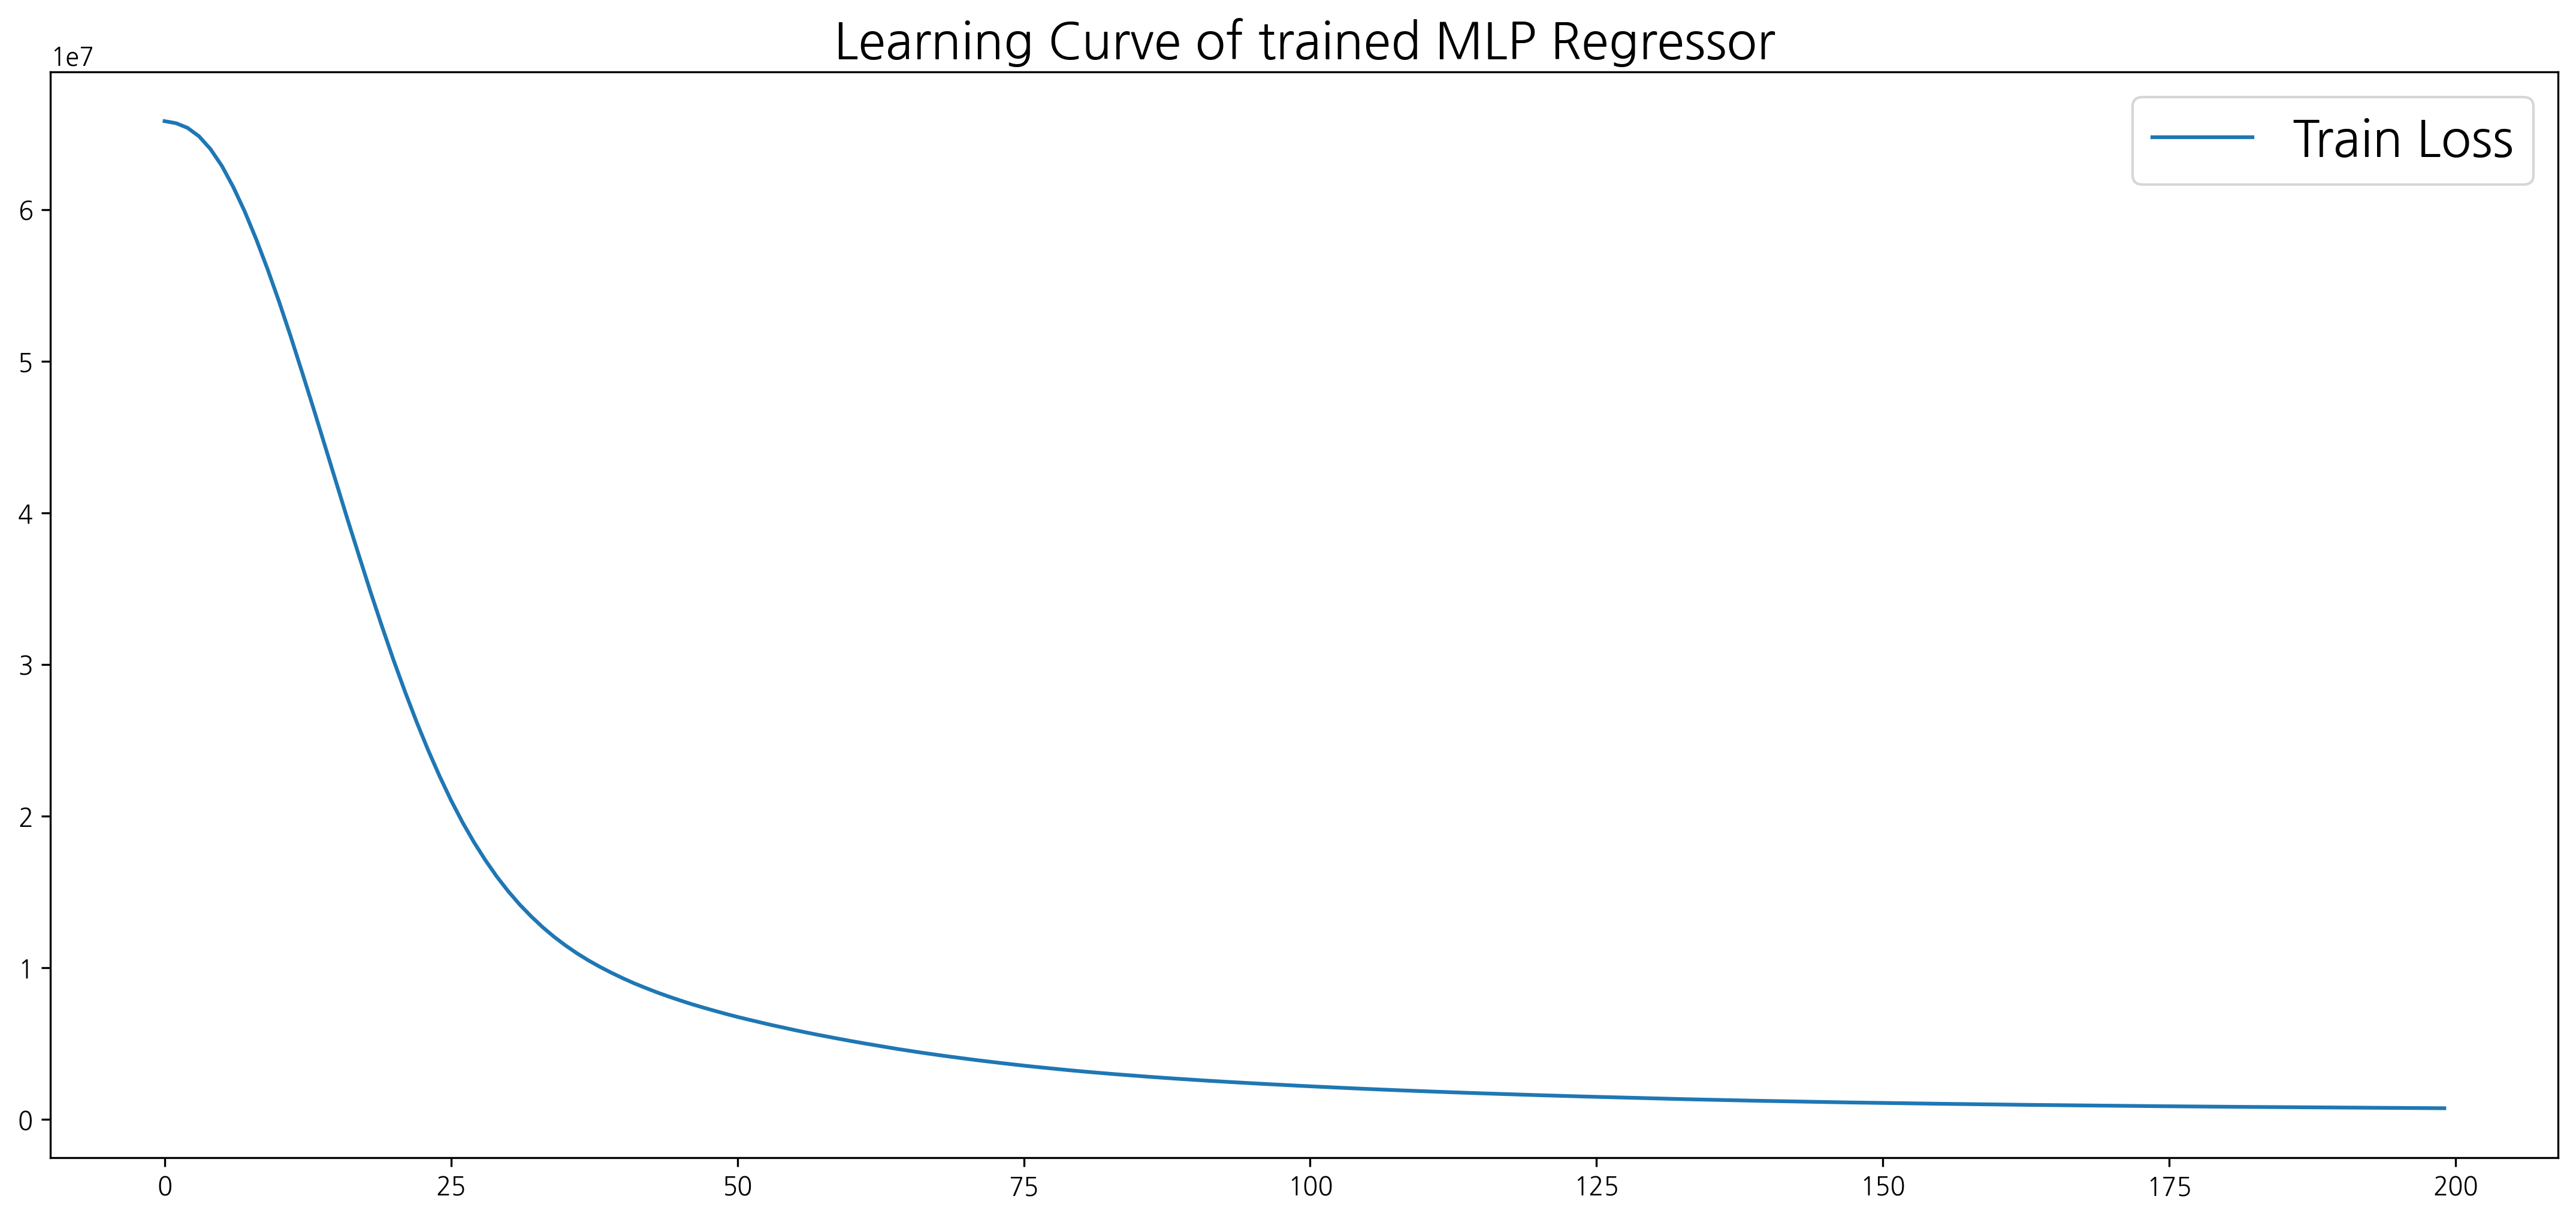

In [39]:
plt.figure(figsize=(18,8))

train_loss_values = reg_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=20)
plt.title("Learning Curve of trained MLP Regressor", fontsize=20)
plt.show()

## 4. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Regressor 결과 확인 및 성능 평가 : Training Data

In [40]:
# 학습한 데이터에 대한 예측값
train_y_pred = reg_mlp.predict(train_X)

train_mae = mean_absolute_error(train_y, train_y_pred)
train_mse = mean_squared_error(train_y, train_y_pred)
train_mape = mean_absolute_percentage_error(train_y, train_y_pred)
train_r2 = r2_score(train_y, train_y_pred)

print('Train MAE  : {:.3f}'.format(train_mae))
print('Train MSE  : {:.3f}'.format(train_mse))
print('Train MAPE : {:.3f}'.format(train_mape))
print('Train R2   : {:.3f}'.format(train_r2))

Train MAE  : 921.827
Train MSE  : 1454672.551
Train MAPE : 0.093
Train R2   : 0.896


### 학습된 MLP Regressor 결과 확인 및 성능 평가 : Testing Data

In [41]:
# 학습한 데이터에 대한 예측값
test_y_pred = reg_mlp.predict(test_X)

test_mae = mean_absolute_error(test_y, test_y_pred)
test_mse = mean_squared_error(test_y, test_y_pred)
test_mape = mean_absolute_percentage_error(test_y, test_y_pred)
test_r2 = r2_score(test_y, test_y_pred)

print('Test MAE  : {:.3f}'.format(test_mae))
print('Test MSE  : {:.3f}'.format(test_mse))
print('Test MAPE : {:.3f}'.format(test_mape))
print('Test R2   : {:.3f}'.format(test_r2))

Test MAE  : 1027.609
Test MSE  : 2069086.063
Test MAPE : 0.109
Test R2   : 0.812


### MLP Regressor 예측 결과 결과 확인 : Testing Data

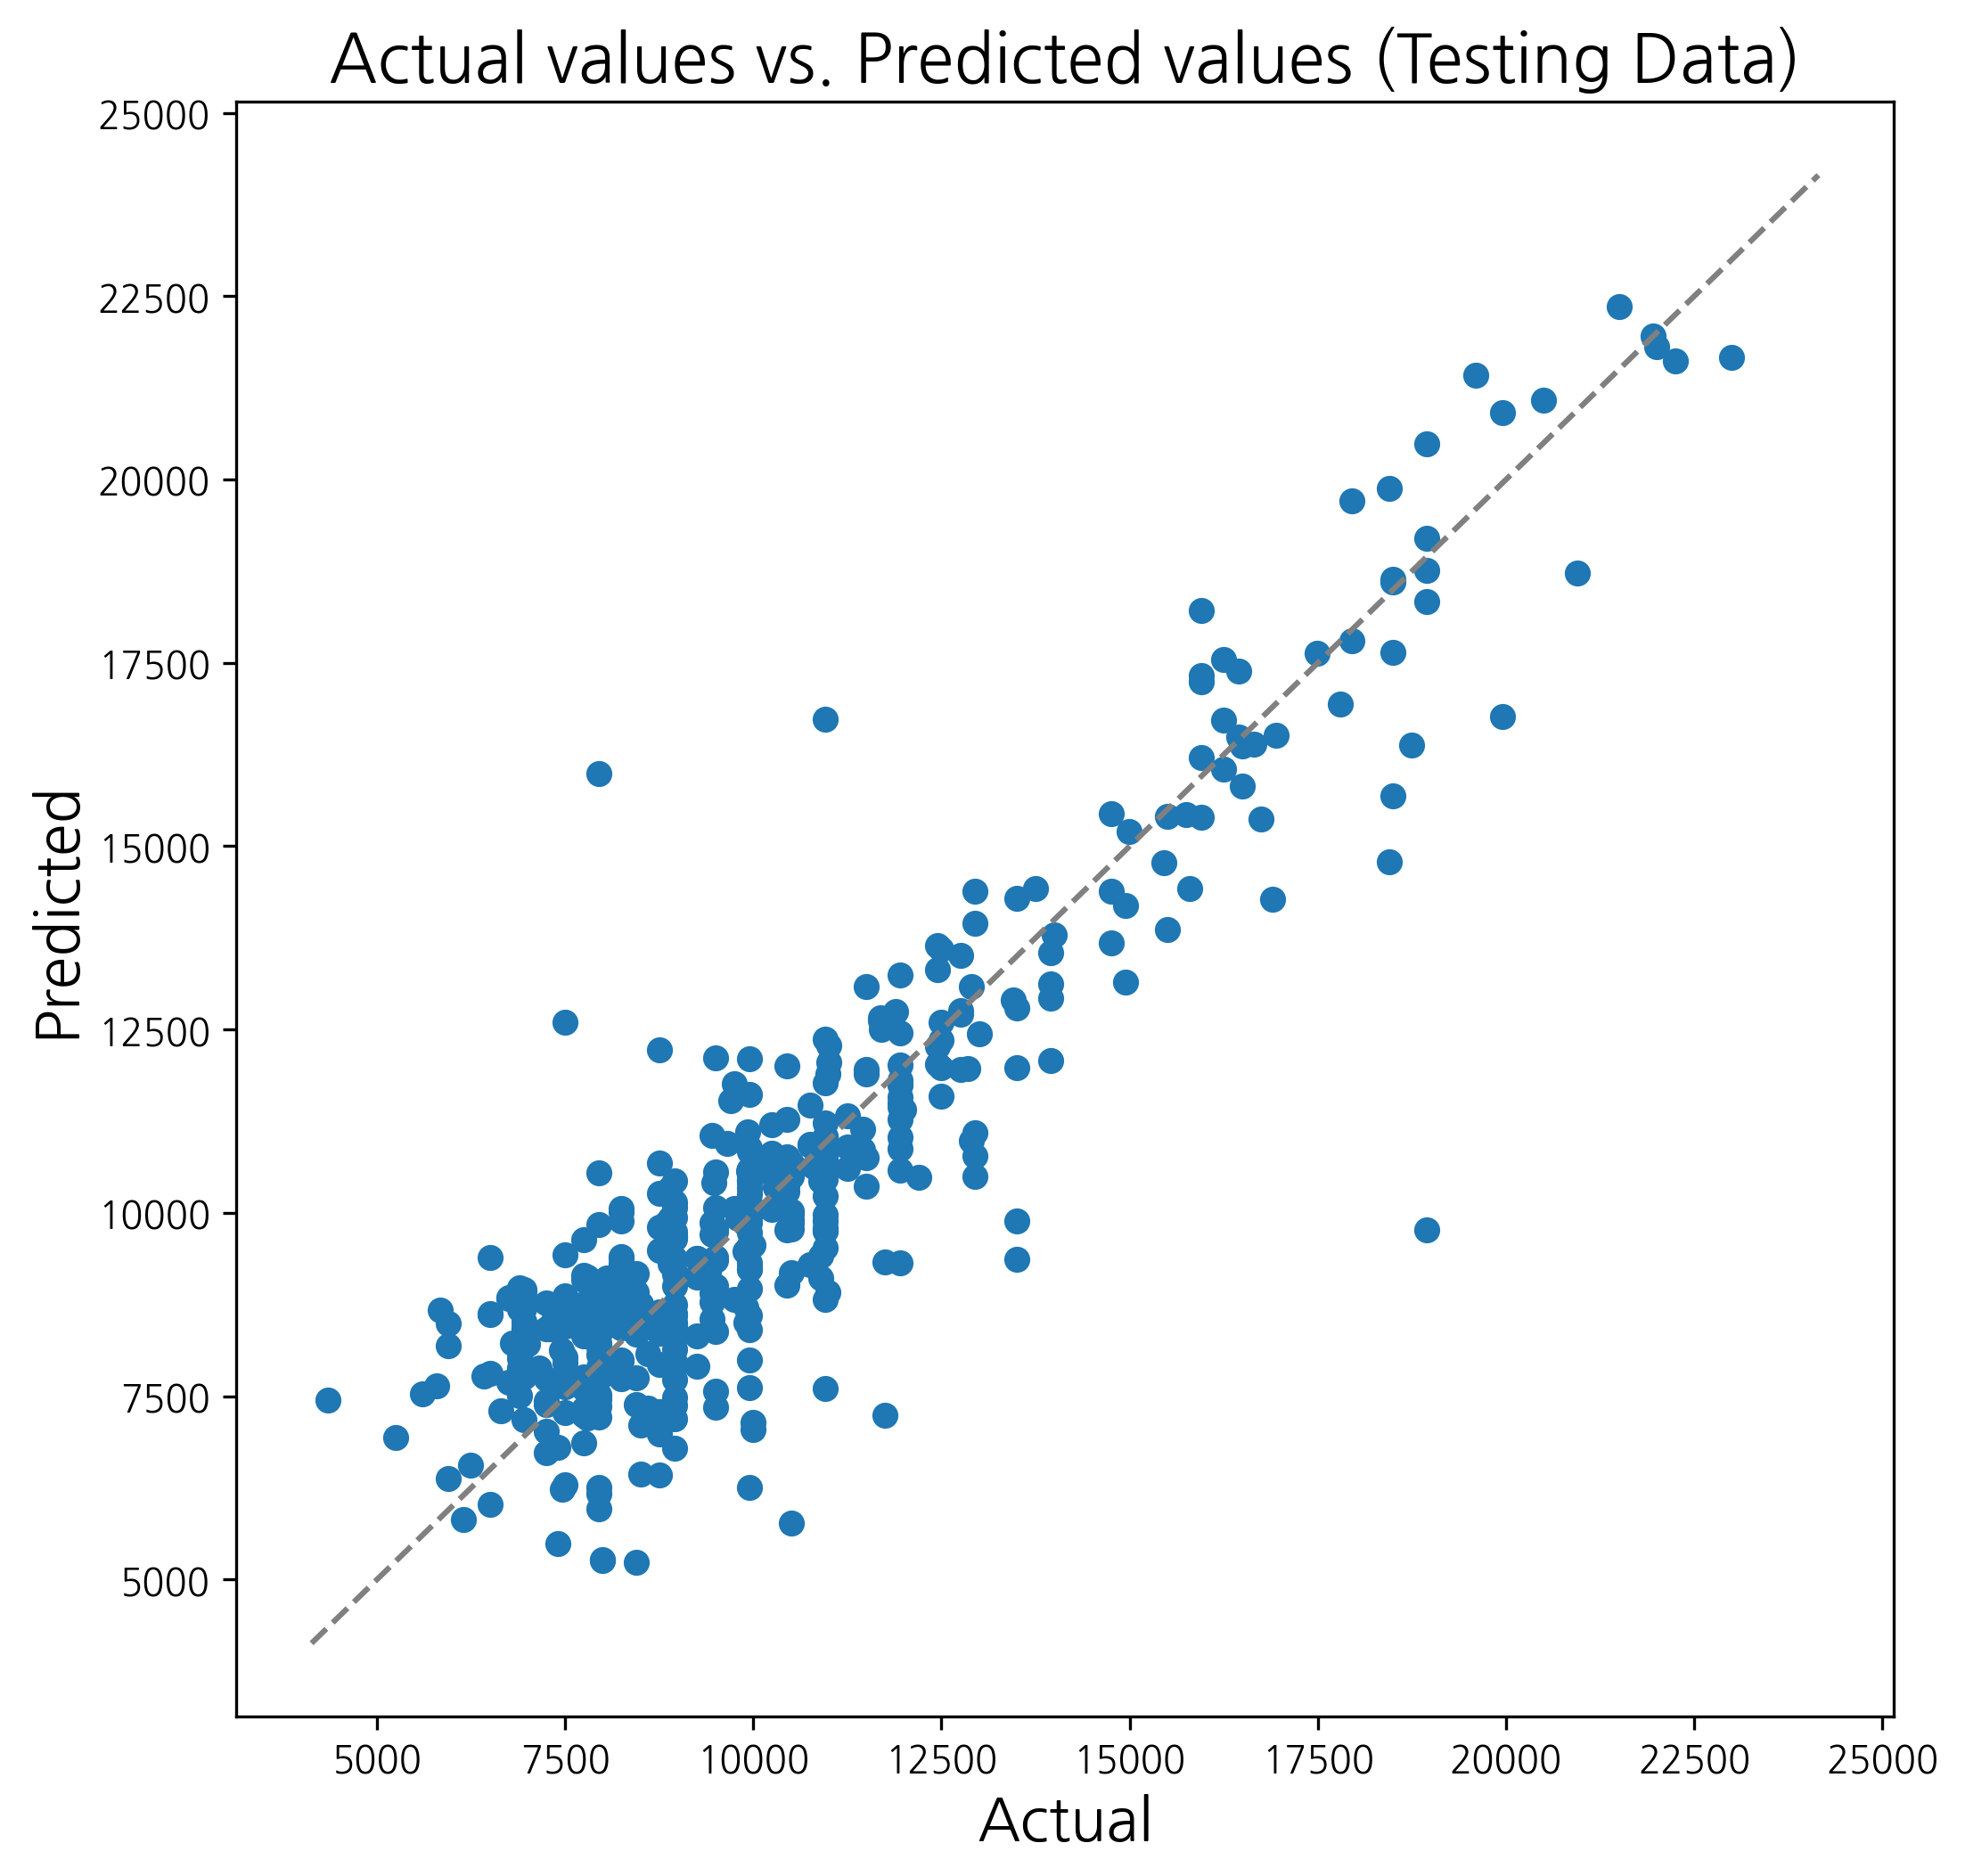

In [42]:
# 산점도 그래프
fig_values = np.concatenate([test_y.squeeze(), test_y_pred.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Testing Data)', size=18)
plt.scatter(test_y, test_y_pred)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()